# ДОМАШНЕЕ ЗАДАНИЕ 3. Классификация текстовых документов

Папулин С.Ю. (papulin.study@yandex.ru)

## Цель работы

Приобрести опыт решения практических задач по машинному обучению, таких как анализ и визуализация исходных данных, обучение, выбор и оценка качества моделей предсказания, посредством языка программирования Python.

## Вариант 3

Набор рецензий на фильмы (reviews)
Файл: data/reviews.tsv

In [2]:
surname = "Овчинникова" # Ваша фамилия

alp = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
w = [4, 42, 21, 21, 34,  1, 44, 26, 18, 43, 38, 26, 18, 43,  3, 49, 45,
        7, 42, 25,  4,  9, 36, 33, 31, 29,  5, 31,  4, 19, 24, 27, 33]
d = dict(zip(alp, w))
variant =  sum([d[el] for el in surname.lower()]) % 3 + 1
print("Ваш вариант - ", variant)


Ваш вариант -  3


In [3]:
%%html
<link href="css/style.css" rel="stylesheet" type="text/css">

In [4]:
globalRS = 123

## Задание 1. Оценка качества классификации текстовых данных (2 балла)

In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix

import sys
sys.path.insert(0, "../lib/")

from plot_confusion_matrix import plot_confusion_matrix

## Загрузка исходных данных


In [8]:
FILE_PATH = "../data/reviews.tsv"

In [9]:
# No header for reviews table
reviews_ds = pd.read_csv(FILE_PATH, sep = '\t', header = None)

In [10]:
reviews_ds

,0,1
0,0,unless bob crane is someone of particular inte...
1,1,"finds a way to tell a simple story , perhaps t..."
2,0,"ill-considered , unholy hokum ."
3,0,"nijinsky says , 'i know how to suffer' and if ..."
4,1,the auteur's ear for the way fears and slights...
...,...,...
10657,0,"it's mildly sentimental , unabashedly consumer..."
10658,0,so verbally flatfooted and so emotionally pred...
10659,0,alternative medicine obviously has its merits ...
10660,0,a by-the-numbers patient/doctor pic that cover...


In [11]:
reviews_ds[0] = ["recommend" if r == 1 else "not recommend" for r in reviews_ds[0]]
reviews_ds

,0,1
0,not recommend,unless bob crane is someone of particular inte...
1,recommend,"finds a way to tell a simple story , perhaps t..."
2,not recommend,"ill-considered , unholy hokum ."
3,not recommend,"nijinsky says , 'i know how to suffer' and if ..."
4,recommend,the auteur's ear for the way fears and slights...
...,...,...
10657,not recommend,"it's mildly sentimental , unabashedly consumer..."
10658,not recommend,so verbally flatfooted and so emotionally pred...
10659,not recommend,alternative medicine obviously has its merits ...
10660,not recommend,a by-the-numbers patient/doctor pic that cover...


In [12]:
# Separating the positive/negative information
recomms = np.asarray(reviews_ds[0])
recomms

array(['not recommend', 'recommend', 'not recommend', ...,
       'not recommend', 'not recommend', 'not recommend'], dtype=object)

In [13]:
# Separating the reviews
reviews = reviews_ds[1]
reviews = np.asarray(reviews)
reviews

array(["unless bob crane is someone of particular interest to you , this film's impressive performances and adept direction aren't likely to leave a lasting impression . ",
       'finds a way to tell a simple story , perhaps the simplest story of all , in a way that seems compelling and even original . ',
       'ill-considered , unholy hokum . ', ...,
       'alternative medicine obviously has its merits . . . but ayurveda does the field no favors . ',
       'a by-the-numbers patient/doctor pic that covers all the usual ground',
       "according to the script , grant and bullock's characters are made for each other . but you'd never guess that from the performances . "],
      dtype=object)

## Разбиение загруженных данных

In [14]:
# Splitting the test/train
x_train, x_test, y_train, y_test = train_test_split(reviews, recomms, test_size=0.2, random_state = globalRS)

##  Перевод текстовых данных в векторный вид. 
Для этого воспользуйтесь средствами sklearn для трансформации текстовых документов в векторы TF-IDF (настроить на обучающем подмножестве, n-gram=1, слова в нижний регистр). 

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
count_vectorizer = CountVectorizer(analyzer = "word", ngram_range = (1,1), 
                                   stop_words = None, lowercase = True,
                                   binary = False, strip_accents = None)
count_vectorizer

CountVectorizer()

In [17]:
train_count_v = count_vectorizer.fit_transform(x_train)
test_count_v = count_vectorizer.transform(x_test)

In [18]:
vectorizer = TfidfVectorizer(lowercase=True, stop_words=None, 
                             use_idf=True, ngram_range=(1,1),
                             smooth_idf=False)                        
vectorizer

TfidfVectorizer(smooth_idf=False)

In [19]:
tfidf_train_v = vectorizer.fit_transform(x_train)
tfidf_test_v = vectorizer.transform(x_test)

In [20]:
tfidf_train_v

<8529x16494 sparse matrix of type '<class 'numpy.float64'>'
	with 143664 stored elements in Compressed Sparse Row format>

In [21]:
# Not needed for this
# tfidf_transformer = TfidfTransformer(norm=None, use_idf=True, smooth_idf=False)
# tfidf_transformer

## Построение K-ближайших соседей ($n=5$)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
knn_rev = KNeighborsClassifier(n_neighbors = 5)
knn_rev.fit(tfidf_train_v, y_train)

KNeighborsClassifier()

## Логистическая регрессия

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
y_train

array(['recommend', 'not recommend', 'not recommend', ..., 'recommend',
       'recommend', 'not recommend'], dtype=object)

In [70]:
# В замечании к заданию random_state = 12345
lin_rev = LogisticRegression(penalty = "l2", fit_intercept = True, max_iter = 500, C = 1,
                                solver = "lbfgs", random_state = 12345)
lin_rev.fit(tfidf_train_v, y_train)

LogisticRegression(C=1, max_iter=500, random_state=12345)

## Наивный Байес: модель Бернулли ($\alpha=1$)

In [27]:
from sklearn.naive_bayes import BernoulliNB

In [28]:
bnb_rev = BernoulliNB(alpha = 1, binarize = None)
bnb_rev.fit(train_count_v, y_train)

BernoulliNB(alpha=1, binarize=None)

## Наивный Байес: полиномиальная модель ($\alpha=1$)

In [29]:
from sklearn.naive_bayes import MultinomialNB

In [30]:
mnb_rev = MultinomialNB(alpha = 1)
mnb_rev.fit(tfidf_train_v, y_train)

MultinomialNB(alpha=1)

## Определение качества классификации на тестовом подмножестве 
### Balanced-Accuracy, R, P, F1 for KNN

In [31]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [32]:
y_pred = knn_rev.predict(tfidf_test_v)
knn_bal_acc = balanced_accuracy_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred, pos_label = 'not recommend')
knn_prec = precision_score(y_test, y_pred, pos_label = 'not recommend')
knn_f1 = f1_score(y_test, y_pred, pos_label = 'not recommend')

print('Balanced-Accuracy: ', round(knn_bal_acc, 3), '\n',  
      'Recall: ', round(knn_recall, 3), '\n',
      'Precision: ', round(knn_prec, 3), '\n',
      'F1 Score: ', round(knn_f1, 3), '\n')

Balanced-Accuracy:  0.726 
 Recall:  0.705 
 Precision:  0.735 
 F1 Score:  0.72 



### Balanced-Accuracy, R, P, F1 for Logistic Regression

In [33]:
y_pred = lin_rev.predict(tfidf_test_v)
lin_bal_acc = balanced_accuracy_score(y_test, y_pred)
lin_recall = recall_score(y_test, y_pred, pos_label = 'not recommend')
lin_prec = precision_score(y_test, y_pred, pos_label = 'not recommend')
lin_f1 = f1_score(y_test, y_pred, pos_label = 'not recommend')

print('Balanced-Accuracy: ', round(lin_bal_acc, 3), '\n',  
      'Recall: ', round(lin_recall, 3), '\n',
      'Precision: ', round(lin_prec, 3), '\n',
      'F1 Score: ', round(lin_f1, 3), '\n')

Balanced-Accuracy:  0.77 
 Recall:  0.747 
 Precision:  0.782 
 F1 Score:  0.764 



### Balanced-Accuracy, R, P, F1 for Bernoulli Model

In [34]:
y_pred = bnb_rev.predict(tfidf_test_v)
bnb_bal_acc = balanced_accuracy_score(y_test, y_pred)
bnb_recall = recall_score(y_test, y_pred, pos_label = 'not recommend')
bnb_prec = precision_score(y_test, y_pred, pos_label = 'not recommend')
bnb_f1 = f1_score(y_test, y_pred, pos_label = 'not recommend')

print('Balanced-Accuracy: ', round(bnb_bal_acc, 3), '\n',  
      'Recall: ', round(bnb_recall, 3), '\n',
      'Precision: ', round(bnb_prec, 3), '\n',
      'F1 Score: ', round(bnb_f1, 3), '\n')

Balanced-Accuracy:  0.771 
 Recall:  0.836 
 Precision:  0.739 
 F1 Score:  0.784 



### Balanced-Accuracy, R, P, F1 for Multinomial Model

In [35]:
y_pred = lin_rev.predict(tfidf_test_v)
mnb_bal_acc = balanced_accuracy_score(y_test, y_pred)
mnb_recall = recall_score(y_test, y_pred, pos_label = 'not recommend')
mnb_prec = precision_score(y_test, y_pred, pos_label = 'not recommend')
mnb_f1 = f1_score(y_test, y_pred, pos_label = 'not recommend')

print('Balanced-Accuracy: ', round(mnb_bal_acc, 3), '\n',  
      'Recall: ', round(mnb_recall, 3), '\n',
      'Precision: ', round(mnb_prec, 3), '\n',
      'F1 Score: ', round(mnb_f1, 3), '\n')

Balanced-Accuracy:  0.77 
 Recall:  0.747 
 Precision:  0.782 
 F1 Score:  0.764 



## Определение времени обучения и предсказания

In [36]:
knn_train_time = %timeit -qo knn_rev.fit(tfidf_train_v, y_train)
print('KNN Train:', '\n', f" t = {knn_train_time.average}s")

knn_predict_time = %timeit -qo knn_rev.predict(tfidf_test_v)
print('KNN Predict:', '\n', f" t = {knn_predict_time.average}s")

KNN Train: 
  t = 0.006508213571428639s
KNN Predict: 
  t = 0.6754368571428456s


In [37]:
knn_train_time = %timeit -qo  knn_rev.fit(tfidf_train_v, y_train)
print('KNN Train:', '\n', f" t = {knn_train_time.average}s")

knn_predict_time = %timeit -qo knn_rev.predict(tfidf_test_v)
print('KNN Predict:', '\n', f" t = {knn_predict_time.average}s")

KNN Train: 
  t = 0.006838332428571415s
KNN Predict: 
  t = 0.6736828142857202s


In [38]:
lr_train_time = %timeit -qo  lin_rev.fit(tfidf_train_v, y_train)
print('LR Train:', '\n', f" t = {lr_train_time.average}s")

lr_predict_time = %timeit -qo lin_rev.predict(tfidf_test_v)
print('LR Predict:', '\n', f" t = {lr_predict_time.average}s")

LR Train: 
  t = 0.10821485428571447s
LR Predict: 
  t = 0.00016051872857141398s


In [39]:
bnb_train_time = %timeit -qo  bnb_rev.fit(tfidf_train_v, y_train)
print('KNN Train:', '\n', f" t = {bnb_train_time.average}s")

bnb_predict_time = %timeit -qo bnb_rev.predict(tfidf_test_v)
print('KNN Predict:', '\n', f" t = {bnb_predict_time.average}s")

KNN Train: 
  t = 0.017761605428571393s
KNN Predict: 
  t = 0.0008880559428571522s


In [40]:
mnb_train_time = %timeit -qo  mnb_rev.fit(tfidf_train_v, y_train)
print('KNN Train:', '\n', f" t = {mnb_train_time.average}s")

mnb_predict_time = %timeit -qo mnb_rev.predict(tfidf_test_v)
print('KNN Predict:', '\n', f" t = {mnb_predict_time.average}s")

KNN Train: 
  t = 0.01759262385714286s
KNN Predict: 
  t = 0.00040052051428571234s


## Значения в датафрейме

In [41]:
metrics = [
            (knn_bal_acc, knn_recall, knn_prec, knn_f1, knn_train_time, knn_predict_time),
            (lin_bal_acc, lin_recall, lin_prec, lin_f1, lr_train_time, lr_predict_time),
            (bnb_bal_acc, bnb_recall, bnb_prec, bnb_f1, bnb_train_time, bnb_predict_time),
            (mnb_bal_acc, mnb_recall, mnb_prec, mnb_f1, mnb_train_time, mnb_predict_time),
          ]

models = ['KNN', 'Logistic Regression', 'Bernoulli', 'Multinomial Bernulli']

metr_names = ['Balanced Accuracy', 'Recall', 'Precision', 'F1 Score', 'Train time', 'Predict time']

df = pd.DataFrame.from_records(metrics, columns = metr_names, index = models)
df

,Balanced Accuracy,Recall,Precision,F1 Score,Train time,Predict time
KNN,0.725710,0.705164,0.734834,0.719693,6.84 ms ± 220 µs per loop (mean ± std. dev. of...,674 ms ± 38.9 ms per loop (mean ± std. dev. of...
Logistic Regression,0.769776,0.747418,0.781925,0.764282,108 ms ± 7.81 ms per loop (mean ± std. dev. of...,161 µs ± 14.2 µs per loop (mean ± std. dev. of...
Bernoulli,0.770837,0.835681,0.739203,0.784487,17.8 ms ± 728 µs per loop (mean ± std. dev. of...,888 µs ± 38 µs per loop (mean ± std. dev. of 7...
Multinomial Bernulli,0.769776,0.747418,0.781925,0.764282,17.6 ms ± 381 µs per loop (mean ± std. dev. of...,401 µs ± 26.4 µs per loop (mean ± std. dev. of...


## Задание 2. Оценка качества классификации текстовых данных посредством кросс-валидации (2 балла)
Повторите решение первого задания с использованием стратифицированной кросс-валидации k-folds (k=4) для разделения исходных данных

In [42]:
# Random_state is needed for shuffle option, left it out
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits = 4)

In [43]:
def kf_mod(model_name, X = reviews, y = recomms, 
                trans_type = 'tfidf', _pos_label = 'not recommend'):
    
    _accs = []
    _precs = []
    _recalls = []
    _f1s = []
    _train_times = []
    _predict_times = []
    
    for i_train, i_test in kf.split(X, y):
        
        x_train = [X[i] for i in i_train]
        x_test = [X[i] for i in i_test]
        
        y_train = [y[i] for i in i_train]
        y_test = [y[i] for i in i_test]
    
        if trans_type == 'tfidf':
            v_train = vectorizer.fit_transform(x_train)
            v_test = vectorizer.transform(x_test)
        else :
            v_train = count_vectorizer.fit_transform(x_train)
            v_test  = count_vectorizer.transform(x_test)  

        model_name.fit(v_train, y_train)
        
        # Measuring the quality by Balanced-Accuracy, R, P, F1
        
        y_pred = model_name.predict(v_test)
        k_acc = balanced_accuracy_score(y_test, y_pred)
        k_rec = recall_score(y_test, y_pred, pos_label = _pos_label)
        k_prec = precision_score(y_test, y_pred, pos_label = _pos_label)
        k_f1 = f1_score(y_test, y_pred, pos_label = _pos_label)        
        
        # Calculating the time
        
        ttk = %timeit -qo model_name.fit(v_train, y_train)
        ptk = %timeit -qo model_name.predict(v_test)
        
        ttk = ttk.average
        ptk = ptk.average
        
        # Filling up the lists to find the average + finding the average itself 
        _accs.append(k_acc)
        _recalls.append(k_rec)
        _precs.append(k_prec)
        _f1s.append(k_f1)
        _train_times.append(ttk)
        _predict_times.append(ptk)
        
        acc = sum(_accs) / len(_accs)
        rec = sum(_recalls) / len(_recalls)
        prec = sum(_precs) / len(_precs)
        f1 = sum(_f1s) / len(_f1s)
        tt = sum(_train_times) / len(_train_times)
        pt = sum(_predict_times) / len(_predict_times)

        
    print('For', model_name, ':', '\n')
    print('Balanced Accuracy: ', round(acc, 4) )
    print('Recall: ', round(rec, 4) )
    print('Precision: ', round(prec, 4) ) 
    print('F1: ', round(f1, 4) )
    print('TT: ', round(tt, 4) )
    print('PT: ', round(pt, 4) )

In [44]:
# Previously added classifications' names: count_vectorizer vectorizer knn_rev lin_rev bnb_rev mnb_rev
kf_mod(knn_rev)

For KNeighborsClassifier() : 

Balanced Accuracy:  0.7091
Recall:  0.6909
Precision:  0.7171
F1:  0.7036
TT:  0.0048
PT:  0.8007


In [45]:
kf_mod(lin_rev)

For LogisticRegression(C=1, random_state=12345) : 

Balanced Accuracy:  0.7591
Recall:  0.7515
Precision:  0.7631
F1:  0.7572
TT:  0.1196
PT:  0.0002


In [46]:
kf_mod(bnb_rev)

For BernoulliNB(alpha=1, binarize=None) : 

Balanced Accuracy:  0.7775
Recall:  0.7892
Precision:  0.7713
F1:  0.7801
TT:  0.0105
PT:  0.001


In [47]:
kf_mod(mnb_rev)

For MultinomialNB(alpha=1) : 

Balanced Accuracy:  0.7776
Recall:  0.788
Precision:  0.772
F1:  0.7799
TT:  0.0105
PT:  0.0005


## Задание 3. Выбор модели (4 баллов)

In [48]:
from sklearn.model_selection import StratifiedKFold

In [49]:
recomms_bl = [1 if r == "recommend" else 0 for r in recomms]
recomms_bl

[0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,


In [50]:
y = recomms_bl
X

array(["unless bob crane is someone of particular interest to you , this film's impressive performances and adept direction aren't likely to leave a lasting impression . ",
       'finds a way to tell a simple story , perhaps the simplest story of all , in a way that seems compelling and even original . ',
       'ill-considered , unholy hokum . ', ...,
       'alternative medicine obviously has its merits . . . but ayurveda does the field no favors . ',
       'a by-the-numbers patient/doctor pic that covers all the usual ground',
       "according to the script , grant and bullock's characters are made for each other . but you'd never guess that from the performances . "],
      dtype=object)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(reviews, recomms_bl, test_size=0.2, random_state = globalRS)

In [52]:
y = np.array(y)

### Разбиение обучающего подмножества (train) посредством стратифицированной кросс-валидации с kfolds

In [53]:
skf = StratifiedKFold(n_splits = 4)

splits = skf.split(X_train, y_train)
i = 0
for train_index, test_index in splits:
    print("Split", i + 1)
    print("\tindices:\t{}{}".format(train_index, test_index))
    print("\ty:\t\t{}{}".format(y[train_index], y[test_index]))
    i += 1

Split 1
	indices:	[2122 2125 2126 ... 8526 8527 8528][   0    1    2 ... 2143 2144 2145]
	y:		[0 0 0 ... 0 1 1][0 1 0 ... 0 1 0]
Split 2
	indices:	[   0    1    2 ... 8526 8527 8528][2122 2125 2126 ... 4262 4264 4265]
	y:		[0 1 0 ... 0 1 1][0 0 0 ... 0 1 1]
Split 3
	indices:	[   0    1    2 ... 8526 8527 8528][4263 4266 4267 ... 6408 6413 6415]
	y:		[0 1 0 ... 0 1 1][1 0 1 ... 0 0 1]
Split 4
	indices:	[   0    1    2 ... 6408 6413 6415][6374 6377 6380 ... 8526 8527 8528]
	y:		[0 1 0 ... 0 0 1][1 0 0 ... 0 1 1]


### Обучение и тестирование на разбитом обучающем подмножестве классификаторов с заданными параметрами

In [54]:
# количество соседей: np.arange(1, 150, 20), параметр регуляризации: np.logspace(-2, 10, 8, base=10), 
# сглаживающий параметр: np.logspace(-4, 1, 8, base=10)

In [79]:
nbr = np.arange(1, 150, 20)
regul = np.logspace(-2, 10, 8, base = 10)
par = np.logspace(-4, 1, 8, base=10)

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [56]:
def calc_knn ():
    knn_mod = KNeighborsClassifier()
    nbr = np.arange(1, 150, 20)
    pipeline = Pipeline([
        ("TfIDF", vectorizer), 
        ("knn_model", knn_mod)
    ])

    parameters = {
        "knn_model__n_neighbors": nbr
    }

# Training parameters

    grid_class_parameters = {
        "estimator": pipeline,
        "param_grid": parameters,
        "cv": skf
    }
    
# Training
    grid_search = GridSearchCV(**grid_class_parameters)
    grid_search.fit(X_train, y_train)
    
    return grid_search

# # Средние проверочные ошибки для каждой степени
# mses_avg = np.abs(grid_search.cv_results_["mean_test_score"])

# for indx, mse_avg in enumerate(mses_avg):
#     print("{}) Test MSE for degree {}: {}".format(indx+1, nbr[indx], mse_avg))

# print("Best parameters:", grid_search.best_params_["knn_model__n_neighbors"])

# # Предсказания для тестового множества
# y_test__pred = grid_search.predict(X_test)

# pipeline.get_params().keys()

# mse_test = mean_squared_error(y_test, y_test__pred)

# print("Test MSE:", mse_test)


# Plotting

# df = pd.DataFrame(grid_search.cv_results_)
# df = df[['mean_fit_time', 'mean_score_time', 'mean_test_score', 'rank_test_score']]

In [67]:
def calc_LR():
    regul = np.logspace(-2, 10, 8, base = 10)
    pipeline = Pipeline([
        ("TfIDF", vectorizer), 
        ("linear_model", lin_rev)
    ])

# pipeline.get_params().keys()

    parameters = {
        "linear_model__C": regul
    }

# Training parameters

    grid_class_parameters = {
        "estimator": pipeline,
        "param_grid": parameters,
        "cv": skf
    }

    # Training
    grid_search = GridSearchCV(**grid_class_parameters)
    grid_search.fit(X_train, y_train)
    return grid_search

In [66]:
def calc_bnb():
    
    bnb_mod = BernoulliNB(binarize = None)

    par = np.logspace(-4, 1, 8, base=10)

    pipeline = Pipeline([
        ("TfIDF", count_vectorizer), 
        ("bernoulli_model", bnb_mod)
    ])

    pipeline.get_params().keys()

    parameters = {
        "bernoulli_model__alpha": par
    }

    # Training parameters

    grid_class_parameters = {
        "estimator": pipeline,
        "param_grid": parameters,
        "cv": skf
    }

    # Training
    grid_search = GridSearchCV(**grid_class_parameters)
    grid_search.fit(X_train, y_train)
    
    return grid_search

In [68]:
def calc_mnb():
    
    mnb_reg = MultinomialNB()

    par = np.logspace(-4, 1, 8, base=10)

    pipeline = Pipeline([
        ("TfIDF", count_vectorizer), 
        ("multinomial_model", mnb_reg)
    ])

    pipeline.get_params().keys()

    parameters = {
        "multinomial_model__alpha": par
    }

    # Training parameters

    grid_class_parameters = {
        "estimator": pipeline,
        "param_grid": parameters,
        "cv": skf
    }

    # Training
    grid_search = GridSearchCV(**grid_class_parameters)
    grid_search.fit(X_train, y_train)
    
    return grid_search

In [71]:
gs_knn11 = calc_knn()
gs_LR11 = calc_LR()
gs_bnb11 = calc_bnb()
gs_mnb11 = calc_mnb()

In [72]:
vectorizer = TfidfVectorizer(lowercase=True, stop_words=None, 
                             use_idf=True, ngram_range=(2, 2),
                             smooth_idf=False) 

count_vectorizer = CountVectorizer(analyzer = "word", ngram_range = (2, 2), 
                                   stop_words = None, lowercase = True,
                                   binary = False, strip_accents = None)

In [73]:
gs_knn22 = calc_knn()
gs_LR22 = calc_LR()
gs_bnb22 = calc_bnb()
gs_mnb22 = calc_mnb()

In [74]:
vectorizer = TfidfVectorizer(lowercase=True, stop_words=None, 
                             use_idf=True, ngram_range=(1, 2),
                             smooth_idf=False) 

count_vectorizer = CountVectorizer(analyzer = "word", ngram_range = (1, 2), 
                                   stop_words = None, lowercase = True,
                                   binary = False, strip_accents = None)

In [75]:
gs_knn21 = calc_knn()
gs_LR21 = calc_LR()
gs_bnb21 = calc_bnb()
gs_mnb21 = calc_mnb()

Text(0.5, 0, 'Smoothing parameter')

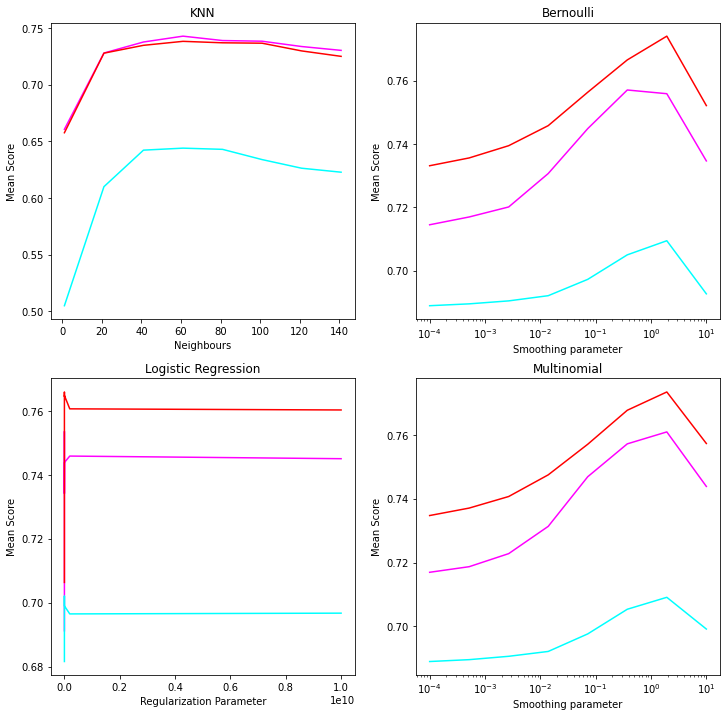

In [80]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
axs[0, 0].plot(nbr, gs_knn11.cv_results_['mean_test_score'], color = 'magenta')
axs[0, 0].plot(nbr, gs_knn22.cv_results_['mean_test_score'], color = 'cyan')
axs[0, 0].plot(nbr, gs_knn21.cv_results_['mean_test_score'], color = 'red')
axs[0, 0].set_title("KNN")
axs[0, 0].set_ylabel("Mean Score")
axs[0, 0].set_xlabel("Neighbours")
axs[1, 0].plot(regul, gs_LR11.cv_results_['mean_test_score'], color = 'magenta')
axs[1, 0].plot(regul, gs_LR22.cv_results_['mean_test_score'], color = 'cyan')
axs[1, 0].plot(regul, gs_LR21.cv_results_['mean_test_score'], color = 'red')
axs[1, 0].set_title("Logistic Regression")
axs[1, 0].set_ylabel("Mean Score")
axs[1, 0].set_xlabel("Regularization Parameter")
axs[0, 1].plot(par, gs_bnb11.cv_results_['mean_test_score'], color = 'magenta')
axs[0, 1].plot(par, gs_bnb22.cv_results_['mean_test_score'], color = 'cyan')
axs[0, 1].plot(par, gs_bnb21.cv_results_['mean_test_score'], color = 'red')
axs[0, 1].set_title("Bernoulli")
axs[0, 1].set_xscale('log')
axs[0, 1].set_ylabel("Mean Score")
axs[0, 1].set_xlabel("Smoothing parameter")
axs[1, 1].plot(par, gs_mnb11.cv_results_['mean_test_score'], color = 'magenta')
axs[1, 1].plot(par, gs_mnb22.cv_results_['mean_test_score'], color = 'cyan')
axs[1, 1].plot(par, gs_mnb21.cv_results_['mean_test_score'], color = 'red')
axs[1, 1].set_title("Multinomial")
axs[1, 1].set_ylabel("Mean Score")
axs[1, 1].set_xscale('log')
axs[1, 1].set_xlabel("Smoothing parameter")

In [81]:
gs_knn11.cv_results_

{'mean_fit_time': array([0.14092314, 0.15630054, 0.15113807, 0.13778365, 0.13850081,
        0.12571788, 0.12579292, 0.14908761]),
 'std_fit_time': array([0.01106385, 0.01097965, 0.01610229, 0.0096376 , 0.01271927,
        0.00019997, 0.00042198, 0.00768678]),
 'mean_score_time': array([0.50466782, 0.6182189 , 0.60546911, 0.60244381, 0.61122805,
        0.59639007, 0.62803197, 0.67901742]),
 'std_score_time': array([0.01762967, 0.01495541, 0.00436012, 0.01809376, 0.0269524 ,
        0.01164257, 0.0331433 , 0.01310923]),
 'param_knn_model__n_neighbors': masked_array(data=[1, 21, 41, 61, 81, 101, 121, 141],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'knn_model__n_neighbors': 1},
  {'knn_model__n_neighbors': 21},
  {'knn_model__n_neighbors': 41},
  {'knn_model__n_neighbors': 61},
  {'knn_model__n_neighbors': 81},
  {'knn_model__n_neighbors': 101},
  {'knn_model__n_neighbors': 121},
  {'knn_m

In [153]:
# Training time counter by best ranking test score

gs_knn11_tt = float(gs_knn11.cv_results_['mean_fit_time'][np.where(gs_knn11.cv_results_['rank_test_score'] == 1)])
gs_knn22_tt = float(gs_knn22.cv_results_['mean_fit_time'][np.where(gs_knn22.cv_results_['rank_test_score'] == 1)])
gs_knn21_tt = float(gs_knn21.cv_results_['mean_fit_time'][np.where(gs_knn21.cv_results_['rank_test_score'] == 1)])

gs_LR11_tt = float(gs_LR11.cv_results_['mean_fit_time'][np.where(gs_LR11.cv_results_['rank_test_score'] == 1)])
gs_LR22_tt = float(gs_LR22.cv_results_['mean_fit_time'][np.where(gs_LR22.cv_results_['rank_test_score'] == 1)])
gs_LR21_tt = float(gs_LR21.cv_results_['mean_fit_time'][np.where(gs_LR21.cv_results_['rank_test_score'] == 1)])

gs_bnb11_tt = float(gs_bnb11.cv_results_['mean_fit_time'][np.where(gs_bnb11.cv_results_['rank_test_score'] == 1)])
gs_bnb22_tt = float(gs_bnb22.cv_results_['mean_fit_time'][np.where(gs_bnb22.cv_results_['rank_test_score'] == 1)])
gs_bnb21_tt = float(gs_bnb21.cv_results_['mean_fit_time'][np.where(gs_bnb21.cv_results_['rank_test_score'] == 1)])

gs_mnb11_tt = float(gs_mnb11.cv_results_['mean_fit_time'][np.where(gs_mnb11.cv_results_['rank_test_score'] == 1)])
gs_mnb22_tt = float(gs_mnb22.cv_results_['mean_fit_time'][np.where(gs_knn22.cv_results_['rank_test_score'] == 1)])
gs_mnb21_tt = float(gs_mnb21.cv_results_['mean_fit_time'][np.where(gs_knn21.cv_results_['rank_test_score'] == 1)])

In [154]:
# Predict time counter on test

gs_knn11_pt = %timeit -qo gs_knn11.best_estimator_.predict(x_test)
gs_knn22_pt = %timeit -qo gs_knn22.best_estimator_.predict(x_test)
gs_knn21_pt = %timeit -qo gs_knn21.best_estimator_.predict(x_test)

gs_LR11_pt = %timeit -qo gs_LR11.best_estimator_.predict(x_test)
gs_LR22_pt = %timeit -qo gs_LR22.best_estimator_.predict(x_test)
gs_LR21_pt = %timeit -qo gs_LR21.best_estimator_.predict(x_test)

gs_bnb11_pt = %timeit -qo gs_bnb11.best_estimator_.predict(x_test)
gs_bnb22_pt = %timeit -qo gs_bnb22.best_estimator_.predict(x_test)
gs_bnb21_pt = %timeit -qo gs_bnb21.best_estimator_.predict(x_test)

gs_mnb11_pt = %timeit -qo gs_mnb11.best_estimator_.predict(x_test)
gs_mnb22_pt = %timeit -qo gs_mnb22.best_estimator_.predict(x_test)
gs_mnb21_pt = %timeit -qo gs_mnb21.best_estimator_.predict(x_test)

In [155]:
# Best parameter 

gs_knn11_best_par = int(nbr[np.where(gs_knn11.cv_results_['rank_test_score'] == 1)])
gs_knn22_best_par = int(nbr[np.where(gs_knn22.cv_results_['rank_test_score'] == 1)])
gs_knn21_best_par = int(nbr[np.where(gs_knn21.cv_results_['rank_test_score'] == 1)])

gs_LR11_best_par = int(nbr[np.where(gs_LR11.cv_results_['rank_test_score'] == 1)])
gs_LR22_best_par = int(nbr[np.where(gs_LR22.cv_results_['rank_test_score'] == 1)])
gs_LR21_best_par = int(nbr[np.where(gs_LR21.cv_results_['rank_test_score'] == 1)])

gs_bnb11_best_par = int(nbr[np.where(gs_bnb11.cv_results_['rank_test_score'] == 1)])
gs_bnb22_best_par = int(nbr[np.where(gs_bnb22.cv_results_['rank_test_score'] == 1)])
gs_bnb21_best_par = int(nbr[np.where(gs_bnb21.cv_results_['rank_test_score'] == 1)])

gs_mnb11_best_par = int(nbr[np.where(gs_mnb11.cv_results_['rank_test_score'] == 1)])
gs_mnb22_best_par = int(nbr[np.where(gs_mnb22.cv_results_['rank_test_score'] == 1)])
gs_mnb21_best_par = int(nbr[np.where(gs_mnb21.cv_results_['rank_test_score'] == 1)])

### Итоговые данные по всем методам для лучших моделей (метод, n-gram, значение параметра модели, время обучения, время предсказания)

In [156]:
# KNN 

n_grams_1 = "1, 1"
n_grams_2 = "2, 2"
n_grams_3 = "2, 1"
knn_metrics = [
                ('KNN', n_grams_1, gs_knn11_best_par, gs_knn11_tt, gs_knn11_pt),
                ('KNN', n_grams_2, gs_knn22_best_par, gs_knn21_tt, gs_knn22_pt),
                ('KNN', n_grams_3, gs_knn21_best_par, gs_knn21_tt, gs_knn21_pt),
    
                ('Logistic Regression', n_grams_1, gs_LR11_best_par, gs_LR11_tt, gs_LR11_pt),
                ('Logistic Regression', n_grams_2, gs_LR22_best_par, gs_LR21_tt, gs_LR22_pt),
                ('Logistic Regression', n_grams_3, gs_LR21_best_par, gs_LR21_tt, gs_LR21_pt),
    
                ('Bernoulli', n_grams_1, gs_bnb11_best_par, gs_bnb11_tt, gs_bnb11_pt),
                ('Bernoulli', n_grams_2, gs_bnb22_best_par, gs_bnb21_tt, gs_bnb22_pt),
                ('Bernoulli', n_grams_3, gs_bnb21_best_par, gs_bnb21_tt, gs_bnb21_pt),
    
                ('Multinomial Bernulli', n_grams_1, gs_mnb11_best_par, gs_mnb11_tt, gs_mnb11_pt),
                ('Multinomial Bernulli', n_grams_2, gs_mnb22_best_par, gs_mnb21_tt, gs_mnb22_pt),
                ('Multinomial Bernulli', n_grams_3, gs_mnb21_best_par, gs_mnb21_tt, gs_mnb21_pt),
              ]

metrics_labels = ["Model", "N Grams", "Parameter", "Train time", "Predict time"]

df_f = pd.DataFrame.from_records(knn_metrics, columns = metrics_labels)
df_f

,Model,N Grams,Parameter,Train time,Predict time
0,KNN,"1, 1",61,0.137784,721 ms ± 23.1 ms per loop (mean ± std. dev. of...
1,KNN,"2, 2",61,0.376497,518 ms ± 12.2 ms per loop (mean ± std. dev. of...
2,KNN,"2, 1",61,0.376497,761 ms ± 36 ms per loop (mean ± std. dev. of 7...
3,Logistic Regression,"1, 1",41,0.500010,32.9 ms ± 1.17 ms per loop (mean ± std. dev. o...
4,Logistic Regression,"2, 2",41,3.272012,48.1 ms ± 2.44 ms per loop (mean ± std. dev. o...
5,Logistic Regression,"2, 1",61,3.272012,71.1 ms ± 2.52 ms per loop (mean ± std. dev. o...
6,Bernoulli,"1, 1",101,0.128411,35.1 ms ± 2.18 ms per loop (mean ± std. dev. o...
7,Bernoulli,"2, 2",121,0.373268,58.4 ms ± 2.77 ms per loop (mean ± std. dev. o...
8,Bernoulli,"2, 1",121,0.373268,73.1 ms ± 4.81 ms per loop (mean ± std. dev. o...
9,Multinomial Bernulli,"1, 1",121,0.126564,37.9 ms ± 3.43 ms per loop (mean ± std. dev. o...


# Задание 4. Оценка влияния количества признаков FeatureHasher на качество классификации (2 баллов)
Как будет меняться качество классификации для обозначенных ранее методов при использовании FeatureHasher (или HashingVectorizer) из пакета sklearn перед TF-IDF преобразованием?

Количество признаков: np.logspace(1, 5, 5, base=10)

In [157]:
feats = np.logspace(1, 5, 5, base = 10)

In [159]:
from sklearn.feature_extraction.text import HashingVectorizer

hash_v = HashingVectorizer(norm=None, alternate_sign = False,
                                    lowercase = True, stop_words = None,
                                    ngram_range=(1, 1))

In [183]:
def calc_knn_hv():
    knn_mod = KNeighborsClassifier()
    pipeline = Pipeline([
        ("hash_v", hash_v),
        ("TfIDF", TfidfTransformer(use_idf=True, smooth_idf=False)), 
        ("knn_model", knn_mod)
    ])
    
    gs_knn_hv = GridSearchCV(pipeline, {"hash_v__n_features": feats.astype(int)}, cv = 4)
    gs_knn_hv.fit(x_train, y_train)
    
    return gs_knn_hv

In [184]:
gs_knn = calc_knn_hv()

C:\Users\blueb\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1450: RuntimeWarning: divide by zero encountered in true_divide
  idf = np.log(n_samples / df) + 1
C:\Users\blueb\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\blueb\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\blueb\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\blueb\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\blueb\anaconda3\lib\site-packages\sklearn\pipeline.py", line 618, in score
   

C:\Users\blueb\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1450: RuntimeWarning: divide by zero encountered in true_divide
  idf = np.log(n_samples / df) + 1
C:\Users\blueb\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\blueb\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\blueb\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\blueb\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\blueb\anaconda3\lib\site-packages\sklearn\pipeline.py", line 618, in score
   

In [185]:
knn_fit_time = gs_knn.cv_results_['mean_fit_time'][np.where(gs_knn.cv_results_['rank_test_score'] == 1)][0]
knn_pred_time = %timeit -qo gs_knn.best_estimator_.predict(x_test)
knn_score = gs_knn.cv_results_['mean_test_score'][np.where(gs_knn.cv_results_['rank_test_score'] == 1)][0]

In [173]:
def calc_LR_hv():
    pipeline = Pipeline([
        ("hash_v", hash_v),
        ("TfIDF", TfidfTransformer(use_idf=True, smooth_idf=False)), 
        ("LR_model", lin_rev)
    ])
    
    gs_LR_hv = GridSearchCV(pipeline, {"hash_v__n_features": feats.astype(int)}, cv = 4)
    gs_LR_hv.fit(x_train, y_train)
    
    return gs_LR_hv

In [186]:
gs_LR_hv = calc_LR_hv()

C:\Users\blueb\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1450: RuntimeWarning: divide by zero encountered in true_divide
  idf = np.log(n_samples / df) + 1
C:\Users\blueb\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\blueb\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\blueb\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\blueb\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\blueb\anaconda3\lib\site-packages\sklearn\pipeline.py", line 618, in score
   

C:\Users\blueb\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1450: RuntimeWarning: divide by zero encountered in true_divide
  idf = np.log(n_samples / df) + 1
C:\Users\blueb\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\blueb\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\blueb\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\blueb\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\blueb\anaconda3\lib\site-packages\sklearn\pipeline.py", line 618, in score
   

In [187]:
LR_fit_time = gs_LR_hv.cv_results_['mean_fit_time'][np.where(gs_LR_hv.cv_results_['rank_test_score'] == 1)][0]
LR_pred_time = %timeit -qo gs_LR_hv.best_estimator_.predict(x_test)
LR_score = gs_LR_hv.cv_results_['mean_test_score'][np.where(gs_LR_hv.cv_results_['rank_test_score'] == 1)][0]

In [175]:
def calc_bnb_hv():
    bnb_mod = BernoulliNB(binarize = None)
    
    pipeline = Pipeline([
        ("hash_v", hash_v),
        ("TfIDF", TfidfTransformer(use_idf=True, smooth_idf=False)), 
        ("Bernoulli_model", bnb_mod)
    ])
    
    gs_bnb_hv = GridSearchCV(pipeline, {"hash_v__n_features": feats.astype(int)}, cv = 4)
    gs_bnb_hv.fit(x_train, y_train)
    
    return gs_bnb_hv

In [188]:
gs_bnb_hv = calc_bnb_hv()

C:\Users\blueb\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1450: RuntimeWarning: divide by zero encountered in true_divide
  idf = np.log(n_samples / df) + 1
C:\Users\blueb\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\blueb\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\blueb\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\blueb\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\blueb\anaconda3\lib\site-packages\sklearn\pipeline.py", line 618, in score
   

C:\Users\blueb\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1450: RuntimeWarning: divide by zero encountered in true_divide
  idf = np.log(n_samples / df) + 1
C:\Users\blueb\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\blueb\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\blueb\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\blueb\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\blueb\anaconda3\lib\site-packages\sklearn\pipeline.py", line 618, in score
   

In [189]:
bnb_fit_time = gs_bnb_hv.cv_results_['mean_fit_time'][np.where(gs_bnb_hv.cv_results_['rank_test_score'] == 1)][0]
bnb_pred_time = %timeit -qo gs_bnb_hv.best_estimator_.predict(x_test)
bnb_score = gs_bnb_hv.cv_results_['mean_test_score'][np.where(gs_bnb_hv.cv_results_['rank_test_score'] == 1)][0]

In [182]:
def calc_mnb_hv():
    
    mnb_reg = MultinomialNB()
    
    pipeline = Pipeline([
        ("hash_v", hash_v),
        ("TfIDF", TfidfTransformer(use_idf=True, smooth_idf=False)), 
        ("Multinomial_model", mnb_reg)
    ])
    
    gs_mnb_hv = GridSearchCV(pipeline, {"hash_v__n_features": feats.astype(int)}, cv = 4)
    gs_mnb_hv.fit(x_train, y_train)    
    
    return gs_mnb_hv

In [190]:
gs_mnb_hv = calc_mnb_hv()

C:\Users\blueb\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1450: RuntimeWarning: divide by zero encountered in true_divide
  idf = np.log(n_samples / df) + 1
C:\Users\blueb\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\blueb\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\blueb\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\blueb\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\blueb\anaconda3\lib\site-packages\sklearn\pipeline.py", line 618, in score
   

C:\Users\blueb\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1450: RuntimeWarning: divide by zero encountered in true_divide
  idf = np.log(n_samples / df) + 1
C:\Users\blueb\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\blueb\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\blueb\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\blueb\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\blueb\anaconda3\lib\site-packages\sklearn\pipeline.py", line 618, in score
   

C:\Users\blueb\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.51494885 0.58506245 0.66279706        nan        nan]
  warnings.warn(


In [195]:
mnb_fit_time = gs_mnb_hv.cv_results_['mean_fit_time'][np.where(gs_mnb_hv.cv_results_['rank_test_score'] == 1)][0]
mnb_pred_time = %timeit -qo gs_mnb_hv.best_estimator_.predict(x_test)
mnb_score = gs_mnb_hv.cv_results_['mean_test_score'][np.where(gs_mnb_hv.cv_results_['rank_test_score'] == 1)][0]

In [180]:
# gs_knn.cv_results_

{'mean_fit_time': array([0.08442497, 0.08908737, 0.0847137 , 0.08703607, 0.09421897]),
 'std_fit_time': array([0.0102591 , 0.00630516, 0.00641797, 0.00843135, 0.00099229]),
 'mean_score_time': array([0.66319054, 0.68192399, 0.52775681, 0.02873617, 0.0304926 ]),
 'std_score_time': array([0.01716725, 0.04637696, 0.00688731, 0.0083437 , 0.00676056]),
 'param_hash_v__n_features': masked_array(data=[10, 100, 1000, 10000, 100000],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'hash_v__n_features': 10},
  {'hash_v__n_features': 100},
  {'hash_v__n_features': 1000},
  {'hash_v__n_features': 10000},
  {'hash_v__n_features': 100000}],
 'split0_test_score': array([0.49976559, 0.54102203, 0.59446789,        nan,        nan]),
 'split1_test_score': array([0.48405253, 0.53142589, 0.61116323,        nan,        nan]),
 'split2_test_score': array([0.48874296, 0.52954972, 0.60131332,        nan,        nan]),
 'split3_test_score

In [193]:
values = [
            (knn_fit_time, knn_pred_time, knn_score),
            (LR_fit_time, LR_pred_time, LR_score),
            (bnb_fit_time, bnb_pred_time, bnb_score),
            (mnb_fit_time, mnb_pred_time, mnb_score)
         ]

metrics_labels = ["Train time", "Predict time", "Balanced Accuracy"]

models = ['KNN', 'Logistic Regression', 'Bernoulli', 'Multinomial Bernulli']

df_hv = pd.DataFrame.from_records(values, columns = metrics_labels, index = models)
df_hv

,Train time,Predict time,Balanced Accuracy
KNN,0.090330,730 ms ± 40.5 ms per loop (mean ± std. dev. of...,0.606872
Logistic Regression,0.118363,31 ms ± 1.18 ms per loop (mean ± std. dev. of ...,0.667252
Bernoulli,0.096338,31.2 ms ± 1.55 ms per loop (mean ± std. dev. o...,0.662797
Multinomial Bernulli,0.082394,29.1 ms ± 1.17 ms per loop (mean ± std. dev. o...,0.662797
